<div class="alert alert-block alert-info" style="margin-top: 20px" >
         <img src="broer.png" width="100" >
         <h1 align="center">BROER GAME COMPANY</h1>
</div>

# Assalammualaikum Warohmatullah Wabarokatuh

### Broer Game Company ingin merilis game terbaru namun belum mengetahui trend game terbaru yang disukai oleh para pecinta gamer saat ini, sehingga top manajemen meminta manager Data Analyst untuk menganalisa dataset dari MIT Game Lab dan memberikan gambaran mengenai trend game saat ini 

## Pilihan Game yang akan di rilis

1. Broer: The Protest Simulator - simulator
2. The Legends of Broer - Adventure
3. Broers of Duty - Shooter
4. Winning Broer - Sport
5. Broer Kombat - Action
6. Dungeon of Broer - RPG

Tujuan :
    1. Melihat Sejarah Perkembangan Game
    2. Melihat Trend Dataset
    3. Membuat Rekomendasi Pengembangan Game 

### Informasi Umum mengenai dataset
1. Rank - Ranking for all sales
2. Name - Name of Game
3. Platform - Platform game (ex: PC,PS4, etc.)
4. Year - Years game realeased
5. Genre - Genre game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other_Sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales.


### Import Semua Library yang dibutuhkan dan load dataset.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns;
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')



### **Daftar Isi :**

1. [Membaca Data](#1)
2. [Membersihkan Data](#2)
3. [Exploratory Data Analysis (EDA)](#3)
4. [Dataset Visualization](#4)
5. [Kesimpulan](#5)



<a id="1"></a> <br>
> ## **1. Membaca Data**

In [2]:
data = pd.read_csv('vgsales.csv')

In [3]:
data.shape

(16598, 11)

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
total_rows = data.count()
total_rows

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

### Kita periksa unique value pada variable Platform, Genre dan Year.

In [8]:
display(data.Platform.unique())
display(data.Genre.unique())
display(data.Year.unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

### Kita dapat melihat terdapat beberapa data yang hilang pada dataset

In [9]:
missing_values = data.isnull().sum()
missing_values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

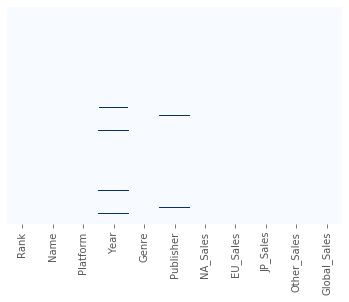

In [10]:
sns.heatmap(data.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [11]:
# Total missing values
total_cells = np.product(data.shape)
total_missing = missing_values.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.18019695691704368


Presentase data yang hilang sangat kecil karena kurang dari 0.2 persen

<a id="2"></a> <br>
> ## **2. Membersihkan Data**

### Replace missing values

kolom "Year" merupakan data numerik jadi kita bisa menggunakan metode replace untuk menghandle missing values

In [12]:
mean = data["Year"].mean()

data["Year"].replace(np.nan, mean, inplace=True)

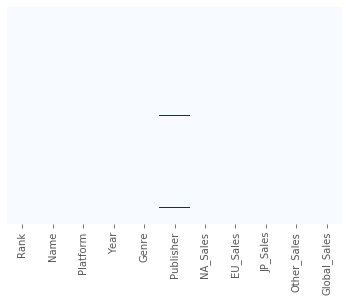

In [13]:
sns.heatmap(data.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [14]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

Data missing values "Year" sudah diganti dengan tahun rata-rata

### Menghapus missing values

Kolom "Publisher" merupakan data non-numerik, dikarenakan sudah diklarifikasi tidak ada yang mengetahui data tersebut apa?, maka kita putuskan untuk mengapus data yang unknown

In [15]:
# Hapus seluruh row yang mengandung missing value
data = data.dropna(axis=0)
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [16]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Missing values sudah berhasil dibersihkan sehingga data dapat di eksplorasi

In [17]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [18]:
data[["Year"]] = data[["Year"]].astype("int")

Ubah data tahun menjadi format integer

### Binning 

kita akan kategorikan tahun game dirilis menjadi kelompok < 2000, 2000 - 2010 dan > 2010

In [19]:
bins = np.linspace(min(data["Year"]), max(data["Year"]), 4)

In [20]:
group_names = ["< 2000", "2000 - 2010", "> 2010 "]

In [21]:
data["Year_Binned"] = pd.cut(data["Year"], bins, labels = group_names, include_lowest = True)
data[["Year", "Year_Binned"]].head(10)

,Year,Year_Binned
0,2006,2000 - 2010
1,1985,< 2000
2,2008,> 2010
3,2009,> 2010
4,1996,2000 - 2010
5,1989,< 2000
6,2006,2000 - 2010
7,2006,2000 - 2010
8,2009,> 2010
9,1984,< 2000


In [22]:
data["Year_Binned"].value_counts()

> 2010         9194
2000 - 2010    6981
< 2000          365
Name: Year_Binned, dtype: int64

Text(0.5, 1.0, 'Year bins')

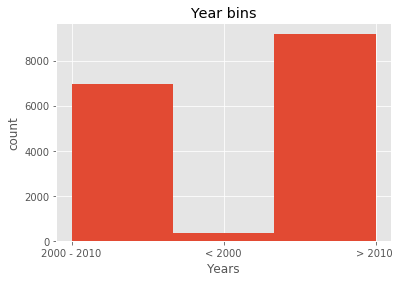

In [23]:
plt.pyplot.hist(data["Year_Binned"], bins = 3)

# Atur x/y label dan Judul plot 
plt.pyplot.ylabel("count")
plt.pyplot.xlabel("Years")
plt.pyplot.title("Year bins")

Klasifikasi dataset berdasarkan tahun game di rilis dengan tiga kategori menunjukan game yang dirilis dengan tahun lebih dari 2010 paling banyak diantara kategori yang lain, 

<a id="3"></a> <br>
> ## **3. Exploratory Data Analysis (EDA)**

kita dapat melihat gambaran umum statistik secara deskriptif dalam langkah awal menganalisa dataset

In [24]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,2006.399456,0.265079,0.146883,0.077998,0.048191,0.538426
std,4790.703200,5.788552,0.817929,0.506129,0.309800,0.188879,1.557424
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4143.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Review kembali tipe data pada dataset

In [25]:
print(data.dtypes)

Rank               int64
Name              object
Platform          object
Year               int32
Genre             object
Publisher         object
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales     float64
Year_Binned     category
dtype: object


### Correlation

Gambaran umum korelasi antara semua variable
note : 0 => tidak ada korelasi
       1 => Korelasi sangat kuat

In [26]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.176690,-0.401236,-0.379068,-0.268056,-0.333081,-0.427391
Year,0.176690,1.000000,-0.091043,0.006215,-0.169043,0.041162,-0.074442
NA_Sales,-0.401236,-0.091043,1.000000,0.767672,0.449864,0.634651,0.941036
EU_Sales,-0.379068,0.006215,0.767672,1.000000,0.435658,0.726326,0.902817
JP_Sales,-0.268056,-0.169043,0.449864,0.435658,1.000000,0.290150,0.611893
Other_Sales,-0.333081,0.041162,0.634651,0.726326,0.290150,1.000000,0.748260
Global_Sales,-0.427391,-0.074442,0.941036,0.902817,0.611893,0.748260,1.000000


Ada beberapa nilai korelasi yang cukup kuat antara Global_Sales dan NA_Sales dan beberapa hubungan berbalik nilai atau korelasi negatif, contohnya antara Rank dan Global_Sales namun dengan nilai korelasi yang kecil

(0, 45.817602006252876)

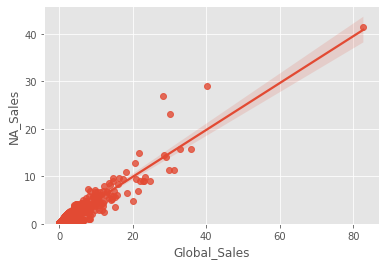

In [27]:
sns.regplot(x="Global_Sales", y="NA_Sales", data=data)
plt.pyplot.ylim(0,)

Kita dapat melihat kolerasi yang cukup kuat antara penjualan secara global dengan penjualan di amerika bagian utara dengan nilai korelasi sekitar 0.94

In [28]:
pearson_coef, p_value = stats.pearsonr(data['NA_Sales'], data['Global_Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9410357489442045  with a P-value of P = 0.0


<a id="4"></a> <br>
> ## **4. Dataset Visualization**

Melihat angka-angka pada dataset untuk memulai visualisasi

In [29]:
print("Number of games: ", len(data))
print("Number of publishers: ", len(data['Publisher'].unique()))
print("Number of platforms: ", len(data['Platform'].unique()))
print("Number of genres: ", len(data['Genre'].unique()))

Number of games:  16540
Number of publishers:  578
Number of platforms:  31
Number of genres:  12


### Distribusi Penjualan setiap tahun menunjukan kenaikan penjualan pada awal tahun 1990 dan mengalami penurunan penjualan pada awal tahun 2010

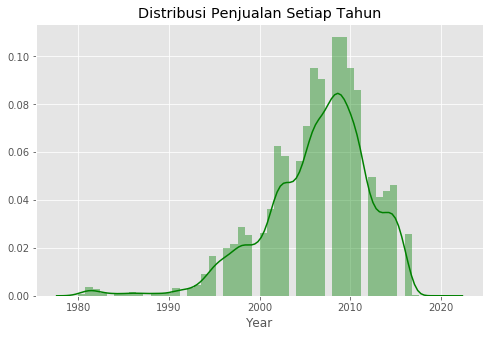

In [30]:
plt.pyplot.figure(figsize=(8,5))
plt.pyplot.title('Distribusi Penjualan Setiap Tahun')
ax = sns.distplot(data['Year'], color = 'g')

###  Grafik dibawah menjelaskan mengenai Jumlah Video Game yang dibuat berdasarkan genre game. terlihat jelas bahwa kebanyakan dalam 20 tahun terakhir genre action paling banyak diminati

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

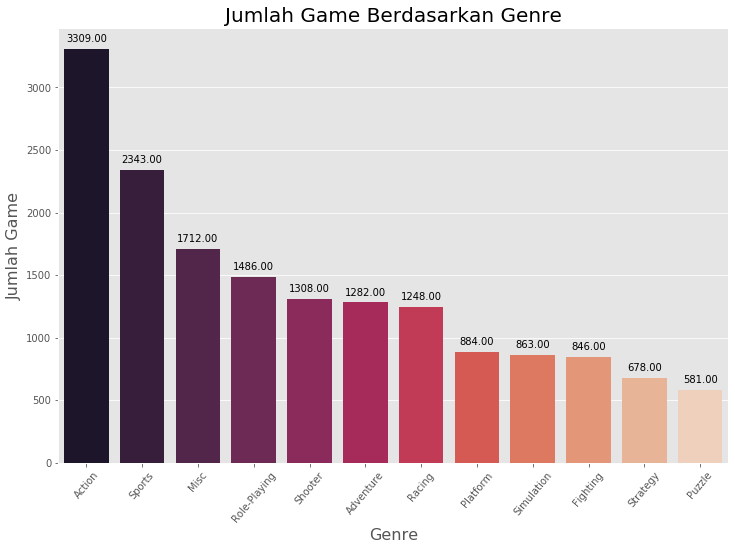

In [31]:
plt.pyplot.figure(figsize=(12, 8))
ax = sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index, palette="rocket")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')
ax.set_title(label='Jumlah Game Berdasarkan Genre', fontsize=20)
ax.set_xlabel(xlabel='Genre', fontsize=16)
ax.set_ylabel(ylabel='Jumlah Game', fontsize=16)
plt.pyplot.xticks(rotation=50)

### Grafik dibawah menunjukan penjualan video games dalam Million US$  Periode antara 2006 sampai 2011 terlihat pendapatan yang sangat besar bagi perusahaan pengembang video game

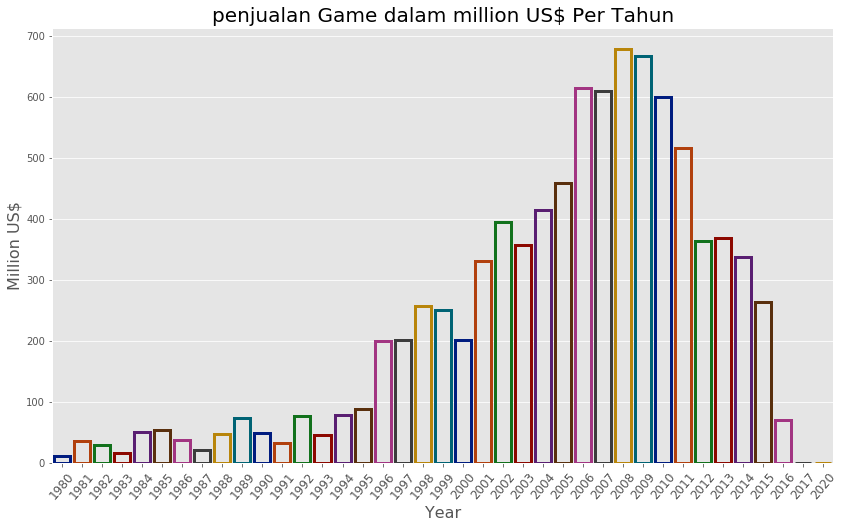

In [32]:
y = data.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.pyplot.figure(figsize=(14,8))
ax = sns.barplot(y = y, x = x,facecolor=(0, 0, 0, 0),
                   linewidth=3,
                   edgecolor=sns.color_palette("dark", 10))
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Million US$', fontsize=16)
ax.set_title(label='penjualan Game dalam million US$ Per Tahun', fontsize=20)
plt.pyplot.show();

###  Grafik dibawah menunjukan jumlah game yang rilis setiap tahun. Jadi banyak korelasi antara pendapatan dan game yang dirilis sangat terlihat, semakin banyak game dirilis maka semakin besar penjualan yang didapatkan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

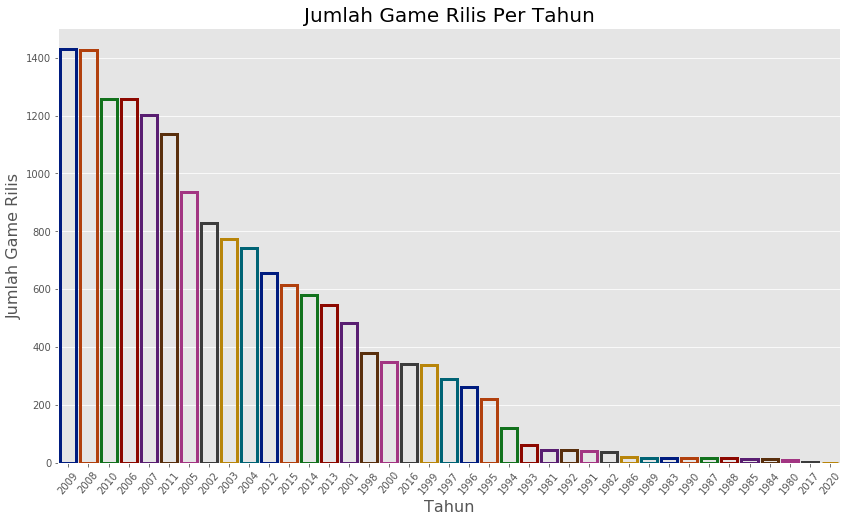

In [33]:
plt.pyplot.figure(figsize=(14, 8))
plt.pyplot.style.use('ggplot')
ax = sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index,facecolor=(0, 0, 0, 0),
                   linewidth=3,
                   edgecolor=sns.color_palette("dark", 10))
ax.set_xlabel(xlabel='Tahun', fontsize=16)
ax.set_ylabel(ylabel='Jumlah Game Rilis', fontsize=16)
ax.set_title(label='Jumlah Game Rilis Per Tahun', fontsize=20)
plt.pyplot.xticks(rotation=50)

### Menggunakan grafik pie untuk visualisasi penjualan dari beberapa wilayah pada 6 tahun tertinggi. kami memilih 6 tahun ini berdasarkan keuntungan yang paling besar selama periode 2006 - 2011. terlihat jelas bahwa Amerika Utara menguasai penjualan video games 

In [34]:
data_to_pie = data.drop(['Name','Platform', 'Genre', 'Publisher','Global_Sales','Rank'], axis = 1).groupby('Year').agg('sum')
data_to_pie.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70


Text(0, 0.5, '')

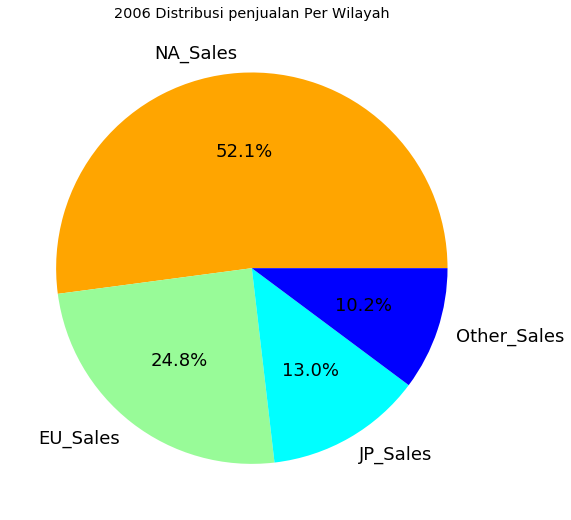

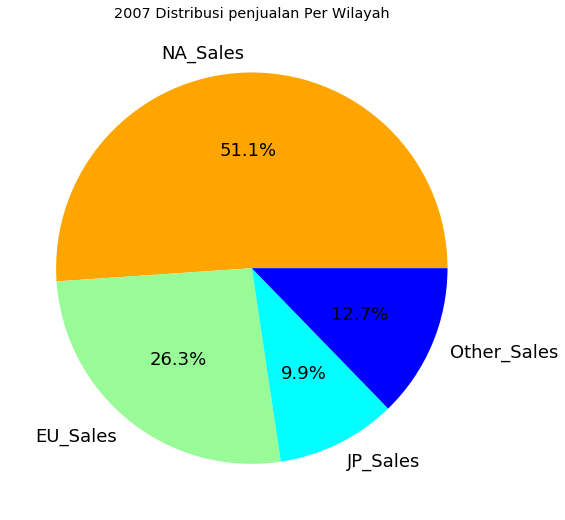

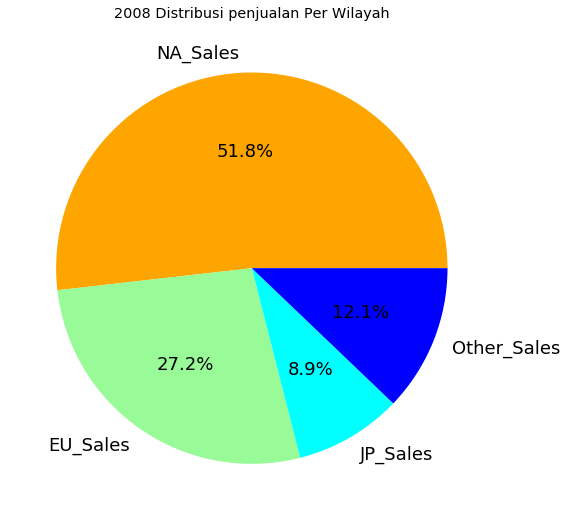

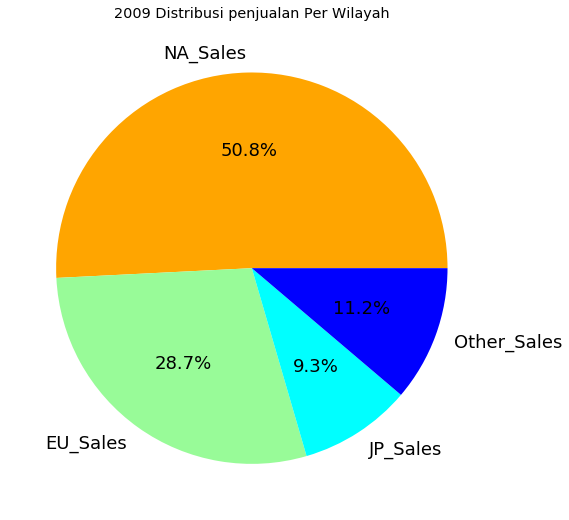

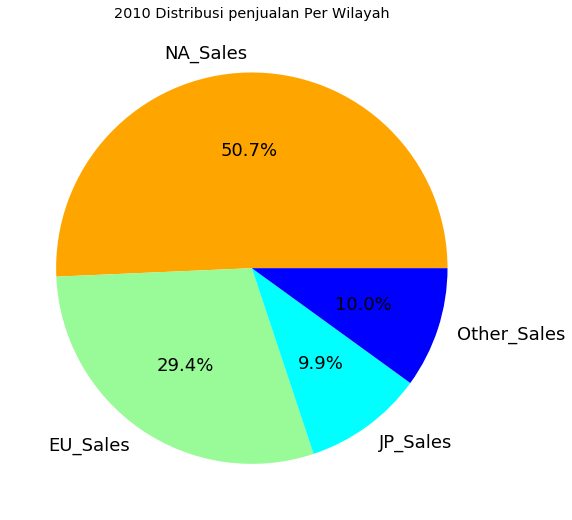

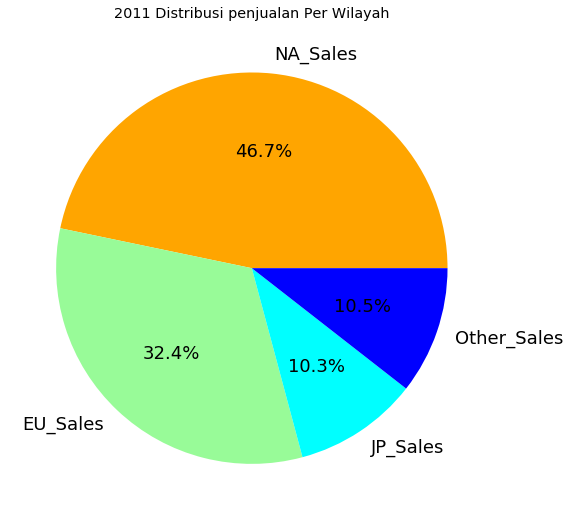

In [35]:
index = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
series = pd.DataFrame({'2006': data_to_pie.loc[[2006],:].values.tolist()[0],
                      '2007': data_to_pie.loc[[2007],:].values.tolist()[0],
                      '2008': data_to_pie.loc[[2008],:].values.tolist()[0],
                      '2009': data_to_pie.loc[[2009],:].values.tolist()[0],
                       '2010': data_to_pie.loc[[2010],:].values.tolist()[0],
                       '2011': data_to_pie.loc[[2011],:].values.tolist()[0]}, index=index)
series.plot.pie(y='2006',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2006 Distribusi penjualan Per Wilayah').set_ylabel('')
series.plot.pie(y='2007',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2007 Distribusi penjualan Per Wilayah').set_ylabel('')
series.plot.pie(y='2008',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2008 Distribusi penjualan Per Wilayah').set_ylabel('')
series.plot.pie(y='2009',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2009 Distribusi penjualan Per Wilayah').set_ylabel('')
series.plot.pie(y='2010',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2010 Distribusi penjualan Per Wilayah').set_ylabel('')
series.plot.pie(y='2011',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2011 Distribusi penjualan Per Wilayah').set_ylabel('')

### Hanya untuk memastikan video game mana yang sangat menguntungkan selama 20 tahun terakhir. kami menggunakan pivot table. Pada tahun 2006 Wii Sports merupakan yang terbaik dengan diikuti oleh Super Mario Bros pada tahun 1985

### Menggunakan Heatmap untuk melihat penjualan pada wilayah yang berbeda berdasarkan genre game 
##### 1. Negara-negara di Amerika Utara lebih berminat pada game action.
##### 2. Wilayah Eropa juga lebih minat terhadap game genre action.
##### 3. Jepang lebih menyukai role-playing games.

In [36]:
genre_comparison = data[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
comparison = genre_comparison.groupby(by=['Genre']).sum()

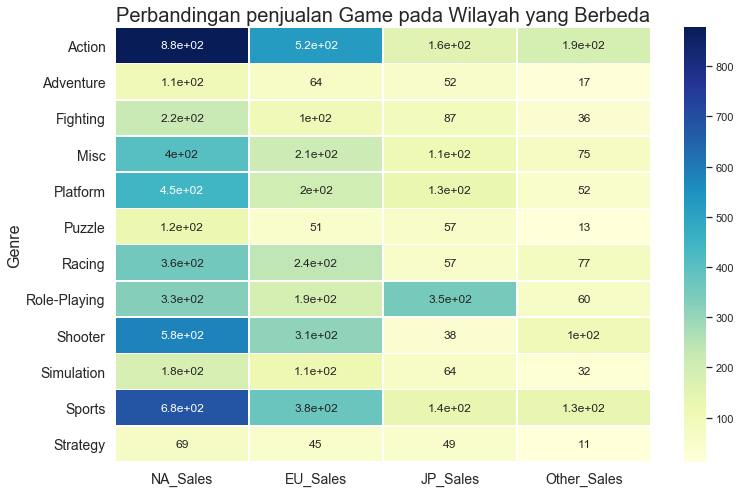

In [37]:
plt.pyplot.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(comparison,cmap="YlGnBu",linewidths=.5, annot=True)

plt.pyplot.xticks(fontsize=14)
plt.pyplot.yticks(fontsize=14)
plt.pyplot.ylabel(ylabel='Genre', fontsize=16)
plt.pyplot.title('Perbandingan penjualan Game pada Wilayah yang Berbeda', fontsize=20)
plt.pyplot.show()

### Grafik dibawah ini untuk mendukung heatmap diatas. Kita dapat menggunakan informasi yang sama pada grafik ini untuk membuat visualisasi menjadi lebih jelas dan mudah dibaca oleh seseorang yang tidak mengerti mengenai heatmap

In [38]:
comparison_table = comparison.reset_index()
comparison_table = pd.melt(comparison_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Region', value_name='Sale_Price')
comparison_table.head()

,Genre,Sale_Region,Sale_Price
0,Action,NA_Sales,877.54
1,Adventure,NA_Sales,105.67
2,Fighting,NA_Sales,221.92
3,Misc,NA_Sales,404.67
4,Platform,NA_Sales,447.05


Text(0.5, 1.0, 'Perbandingan Penjualan Pada Setiap Wilayah Berdasarkan Genre ')

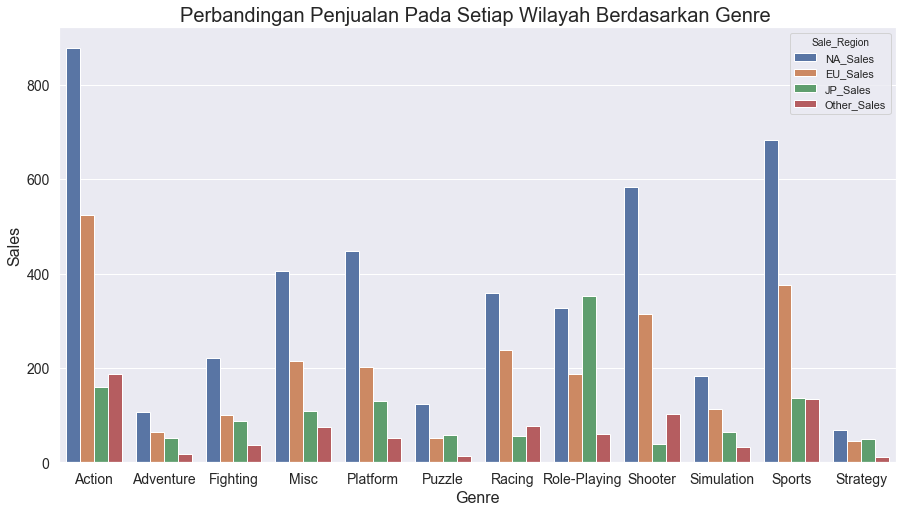

In [39]:
plt.pyplot.figure(figsize = (15,8))
sns.barplot(x='Genre', y = 'Sale_Price', hue = 'Sale_Region', data = comparison_table, palette='deep')
plt.pyplot.xticks(fontsize=14)
plt.pyplot.yticks(fontsize=14)
plt.pyplot.xlabel(xlabel='Genre', fontsize=16)
plt.pyplot.ylabel(ylabel='Sales', fontsize=16)
plt.pyplot.title('Perbandingan Penjualan Pada Setiap Wilayah Berdasarkan Genre ', fontsize=20)

### Setelah melihat grafik lingkaran sebelumnya. Penjualan di negara-negara Amerika bagian utara sangat tinggi. Kita akan menggunakan grafik bar untuk menampilkannya

In [40]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sales"})
top_sale_reg

,region,sales
0,NA_Sales,4384.41
1,EU_Sales,2429.45
2,JP_Sales,1290.09
3,Other_Sales,797.08


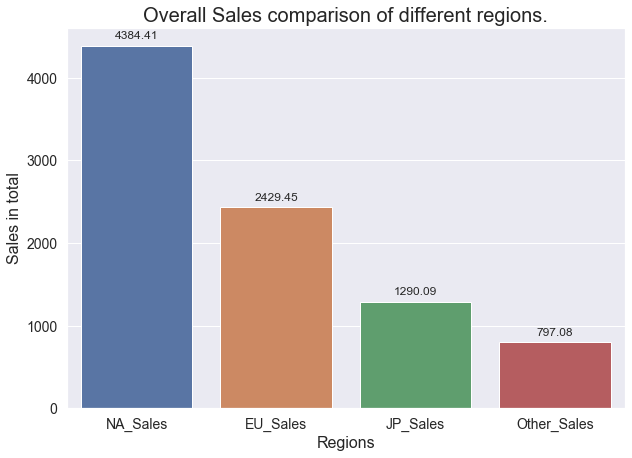

In [41]:
plt.pyplot.figure(figsize = (10,7))
ax = sns.barplot(x='region',y='sales',data=top_sale_reg)
plt.pyplot.xticks(fontsize=14)
plt.pyplot.yticks(fontsize=14)
plt.pyplot.xlabel(xlabel='Regions', fontsize=16)
plt.pyplot.ylabel(ylabel='Sales in total', fontsize=16)
plt.pyplot.title('Overall Sales comparison of different regions.', fontsize=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')

### Berikut ini merupakan Game publisher paling produktif selama 20 tahun terakhir, merilis jumlah game terbanyak sepanjang sejarah

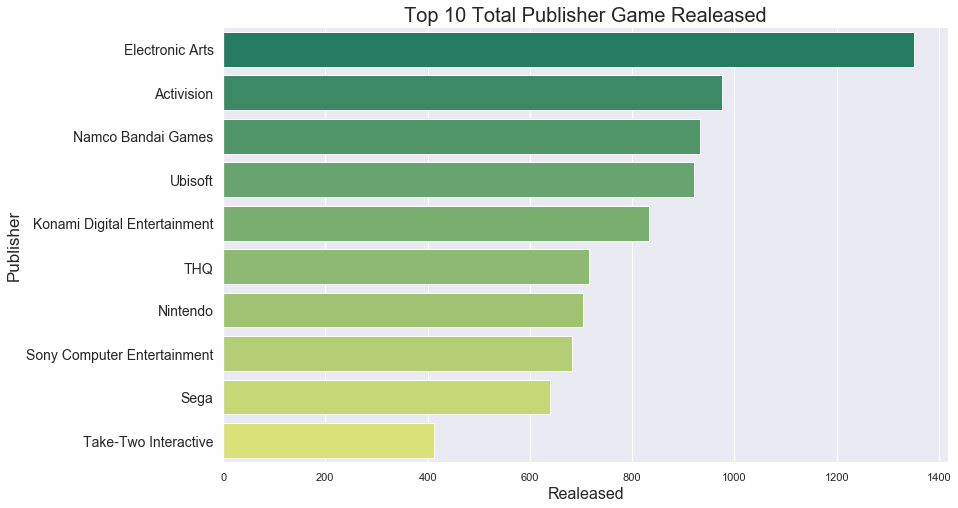

In [42]:
top_publishers = data.groupby(['Publisher']).count().iloc[:,0]
top_publishers = pd.DataFrame(top_publishers.sort_values(ascending=False))[0:10]
publishers = top_publishers.index
top_publishers.columns = ['Releases']

colors = sns.color_palette("summer", len(top_publishers))
plt.pyplot.figure(figsize=(13,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=top_publishers, orient='h', palette=colors)
ax.set_xlabel(xlabel='Realeased', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=17)
ax.set_title(label='Top 10 Total Publisher Game Realeased', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.pyplot.show();

### Namun ketika kita melihan publisher dengan pendapatan terbesar, terdapat beberapa perubahan dari data diatas. Nintendo yang merilis lebih sedikit game memiliki pendapatan terbesar. Mereka lebih mengutamakan kualitan daripada kuantitas

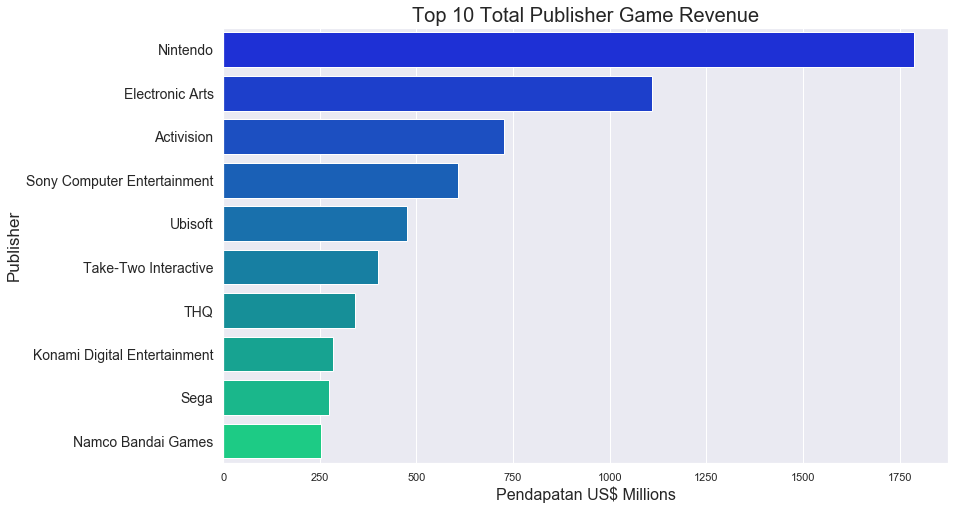

In [43]:
top_publishers_rev = data.groupby(['Publisher']).sum()['Global_Sales']
top_publishers_rev = pd.DataFrame(top_publishers_rev.sort_values(ascending=False))[0:10]
publishers = top_publishers_rev.index
top_publishers_rev.columns = ['Global Sales']

colors = sns.color_palette("winter", len(top_publishers_rev))
plt.pyplot.figure(figsize=(13,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=top_publishers_rev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Pendapatan US$ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=17)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.pyplot.show();

c

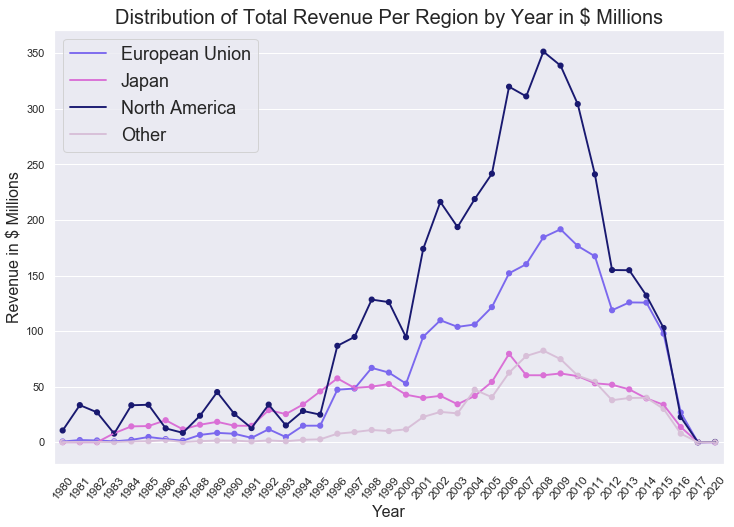

In [44]:
EU = data.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = data.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = data.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = data.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','Japan','North America','Other']

plt.pyplot.figure(figsize=(12,8))
ax = sns.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sns.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sns.pointplot(x=years, y=NA, color='midnightblue', scale=0.7)
ax = sns.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.pyplot.style.use('ggplot')
plt.pyplot.show();

### Dibawah ini plot distribusi dari penjualan game berdasarkan wilayah

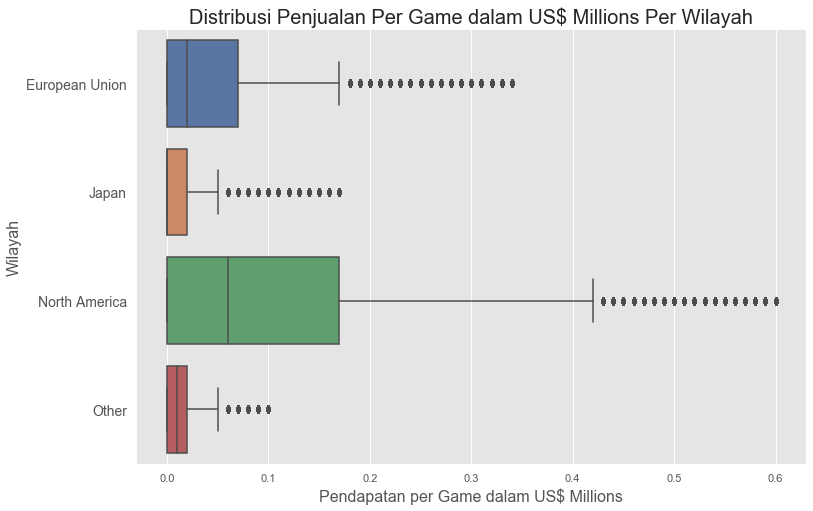

In [49]:
data1 = data
data1 = pd.DataFrame([data1['EU_Sales'], data1['JP_Sales'], data1['NA_Sales'], data1['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data1 = data1[data1 < q]
plt.pyplot.figure(figsize=(12,8))

colors = sns.color_palette("deep", len(data1))
ax = sns.boxplot(data=data1, orient='h', palette=colors)
ax.set_xlabel(xlabel='Pendapatan per Game dalam US$ Millions', fontsize=16)
ax.set_ylabel(ylabel='Wilayah', fontsize=16)
ax.set_title(label='Distribusi Penjualan Per Game dalam US$ Millions Per Wilayah', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.pyplot.style.use('ggplot')
plt.pyplot.show()



### Heatmap Sederhana untuk melihat korelasi diantara beberapa fitur dataset

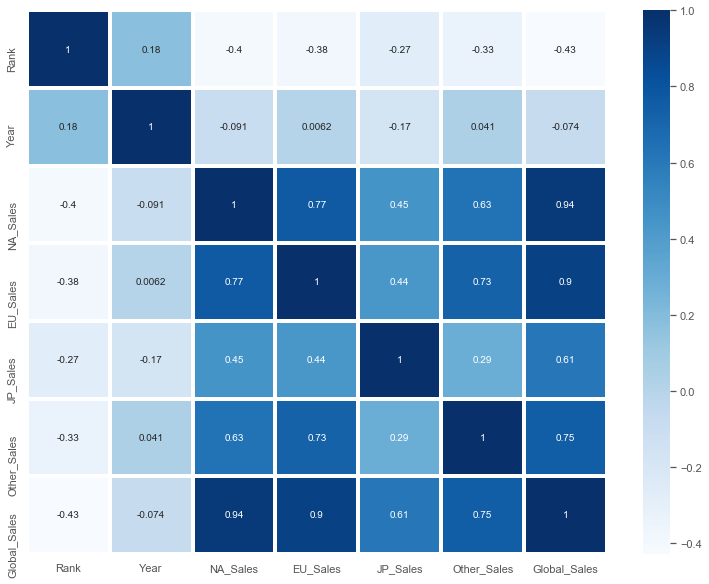

In [50]:
plt.pyplot.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

### Kami akan mengakhiri analisa ini dengan pairplot antara beberapa fitur berdasarkan genre, biasanya ini digunakan untuk memahami algoritma machine learning yang akan digunakan karena tidak adanya data dependent pada dataset ini untuk di prediksi nilainya

In [51]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair.head(2)

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006,Wii,Sports,41.49,29.02,8.46
1,1985,NES,Platform,29.08,3.58,0.77


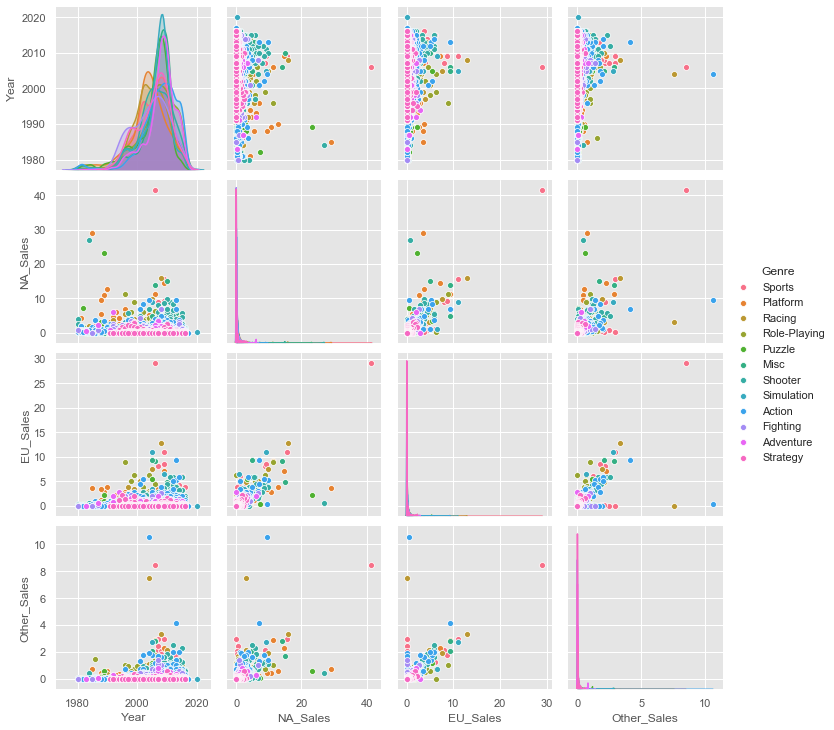

In [52]:
plt.pyplot.style.use('ggplot')
sns.pairplot(data_pair, hue='Genre')

<a id="5"></a> <br>
> ## **5. Kesimpulan**

 ### Sejarah Perkembangan sangat meningkat pesat berdasarkan kualitas dan kuantitasnya sehingga para gamer akan terus dimanjakan oleh perkembangan teknologi game
 
 ### Game dengan Genre Action sangat diminati oleh para gamer di seluruh dunia karena banyak sekali game action dengan kualitas baik yang dikembangkan
 
 ###  Perkembangan video games di dunia sangat cepat, puncak kejayaan game developer ada pada tahun 2006 sampai dengan 2011 karena banyak sekali game yang rilis pada tahun tersebut
 
 ### Rekomendasi untuk BROERS GAME COMPANY berdasarkan analisa dataset diatas yaitu mengembangkan game 
 
 # Broer Kombat - Action

 # Winning Broer - Sport
 

Sekian dan Terima kasih

# Wassalammualaikum Warohmatullah Wabarokatuh

In [ ]:
find my work here 